#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [74]:
# Siddhartha Kumar
# U20240019
# CSAI
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from scipy.spatial import distance 
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

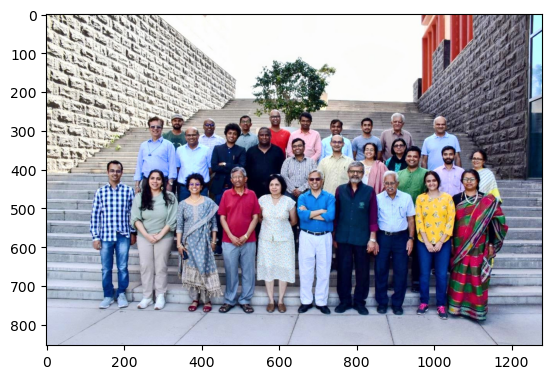

In [77]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread("/Users/apple/Downloads/MLPR LAB 5/Plaksha_Faculty.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## Convert the image to grayscale
gray_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "FACE" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.4  ## Font scale factor
font_color = (0,0,255)  ## Text color in BGR format (here, it's red)
font_thickness = 2 ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x, y-10), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
window_title = f"Total number of face detected are {len(faces_rect)}"
cv2.imshow(window_title, img)
cv2.waitKey(0)
cv2.destroyAllWindows()

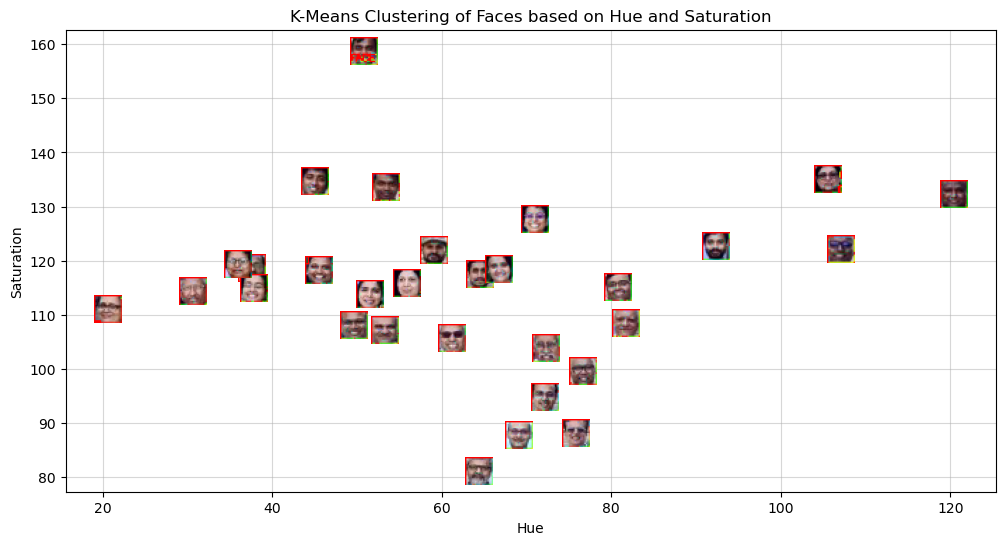

In [78]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("K-Means Clustering of Faces based on Hue and Saturation")
plt.grid(True, linestyle='-', alpha=0.5)
plt.show()

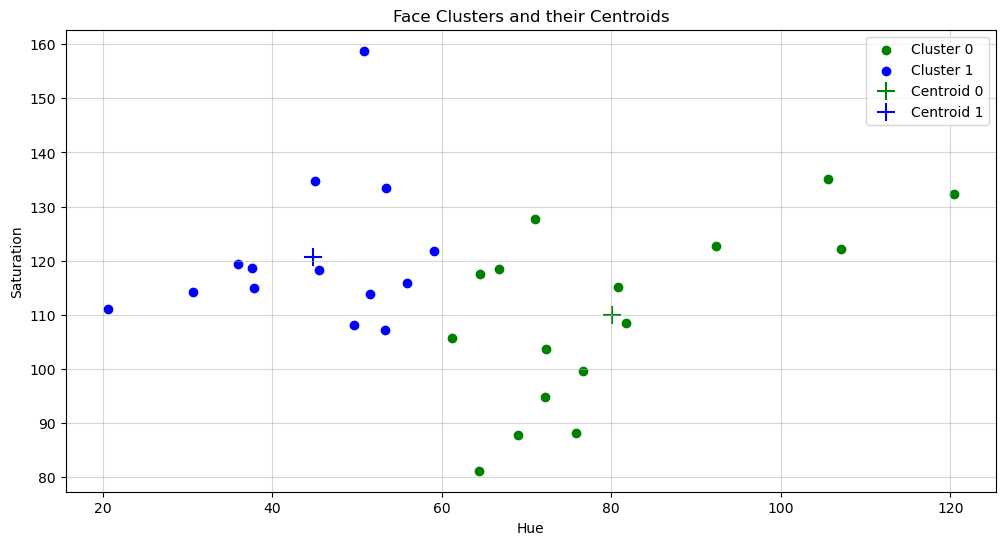

In [79]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], color='green', marker='+', s=150, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='blue', marker='+', s=150, label='Centroid 1')

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Face Clusters and their Centroids")
plt.legend()
plt.grid(True, linestyle='-', alpha=0.5)
plt.show()


In [80]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("/Users/apple/Downloads/MLPR LAB 5/Dr_Shashi_Tharoor.jpg")
# Detect face  in the template image after converting it to gray and store it in template_faces
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray, 1.05, 4, minSize=(25,25))

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow("Detected Face in Template", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()      

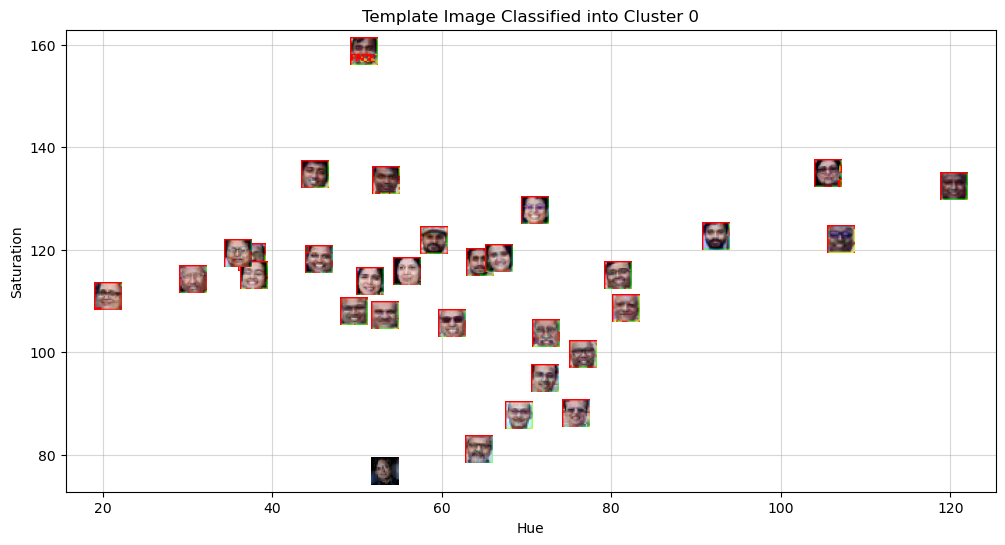

In [81]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)
# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue_saturation = []
template_face_images = [] 

for (x, y, w, h) in template_faces:
    face = template_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    template_hue_saturation.append((hue, saturation))
    template_face_images.append(face)

template_hue_saturation = np.array(template_hue_saturation)

template_hue = template_hue_saturation[0, 0]
template_saturation = template_hue_saturation[0, 1]

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)
plt.plot(template_hue, template_saturation, 'o', markersize=5, color=color)

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title(f"Template Image Classified into Cluster {template_label}")
plt.grid(True, linestyle='-', alpha=0.5)
plt.show()

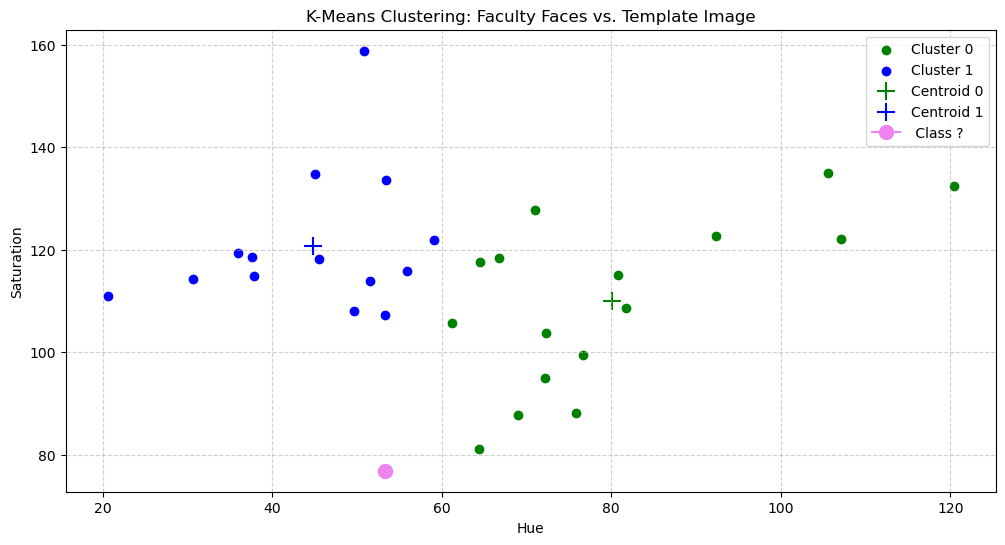

In [82]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)
plt.scatter(centroid_0[0], centroid_0[1], c='green', marker='+', s=150, label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], c='blue', marker='+', s=150, label='Centroid 1')  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("K-Means Clustering: Faculty Faces vs. Template Image")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 
- Euclidean Distance: The straight line distance between two points (as used by default in K-Means and KNN)
- Manhattan Distance: The sum of the absolute differences of their coordinates
- Minkowski Distance: A generalized form that can represent both Euclidean and Manhattan depending on a parameter p
- Cosine Similarity: Measures the cosine of the angle between two vectors, often used for text or high dimensional data

#### 2. What are some real-world applications of distance-based classification algorithms? 
- Facial Recognition: Comparing the Hue and Saturation of a template face (like Dr. Shashi Tharoor) to a database of known faces
- Recommendation Systems: Suggesting products or movies to a user based on how "close" their preferences are to other users
- Anomaly Detection: Identifying fraudulent credit card transactions by finding data points that are at a great distance from normal spending patterns
- Medical Diagnosis: Classifying a patient's symptoms by comparing them to a historical database of similar cases

#### 3. Explain various distance metrics. 
This is for two points (x1, y1) and (x2, y2)

Euclidean Distance: Calculated using the Pythagorean theorem:
d = underoot((x2−x1)^2 + (y2−y1)^2)
 
Manhattan Distance: Calculated by following the grid lines
d = ∣x2−x1∣+∣y2−y1∣

Chebyshev Distance: The maximum difference between any single coordinate dimension:
d = max(∣x2−x1∣,∣y2−y1∣)

#### 4. What is the role of cross validation in model performance? 
Cross validation is a resampling procedure used to evaluate how a model will perform on an independent dataset. It preventing overfitting as it ensures the model hasn't just "memorized" the training data but can actually generalize to new data. In hyperparameter tuning, it helps in selecting the best value for parameters, such as the number of clusters (k) in K-Means or neighbors in KNN. Also, it is reliable, so by training and testing on different "folds" of the data, it provides a more stable estimate of the model's true accuracy.

#### 5. Explain variance and bias in terms of KNN? 
The Bias-Variance Tradeoff in K-Nearest Neighbors is controlled primarily by the value of k (the number of neighbors). 
If k is Low (let's say k=1):
- High Variance: The model is highly sensitive to noise and outliers in the training data (Overfitting)
- Low Bias: The model can capture very complex decision boundaries

If k is high:
- Low Variance: The model is more stable and less affected by individual outliers
- High Bias: The model becomes "too simple" and may ignore important local patterns in the data (Underfitting)